# Purchase Intent Detection from Social Media Posts

**MSc Business Analytics - BUSI1783**  
**Henry Kwabena Asiedu**  
**University of Greenwich**  
**Supervisor: Dr. Raunak Mishra**

---

This notebook analyzes purchase intent from social media posts using machine learning classification models.

**Objective:** Predict whether a social media post indicates purchase intent using linguistic features.

**Models Used:** Logistic Regression, SVM, Naive Bayes, Random Forest

## 1. Import Libraries

Import all required Python libraries for data analysis, visualization, and machine learning.

In [3]:
# ============================================================================
# IMPORT LIBRARIES
# ============================================================================
# Data manipulation libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
# Visualization libraries
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns            # For statistical visualizations
# Machine learning - data preparation
from sklearn.model_selection import train_test_split  # Split data into train/test sets
from sklearn.preprocessing import StandardScaler      # Scale features to standard normal
# Machine learning - classification models
from sklearn.linear_model import LogisticRegression   # Logistic regression classifier
from sklearn.svm import SVC                           # Support Vector Classifier
from sklearn.naive_bayes import GaussianNB            # Gaussian Naive Bayes classifier
from sklearn.ensemble import RandomForestClassifier   # Random Forest ensemble classifier
# Machine learning - evaluation metrics
from sklearn.metrics import (
    classification_report,  # Detailed classification report
    confusion_matrix,       # Confusion matrix for predictions
    f1_score,              # F1 score (harmonic mean of precision and recall)
    precision_score,       # Precision (positive predictive value)
    recall_score,          # Recall (sensitivity)
    roc_auc_score          # Area under ROC curve
)
# General settings
import warnings
warnings.filterwarnings('ignore')  # Suppress warning messages for cleaner output
sns.set_style('whitegrid')         # Set seaborn plot style to white grid
# Confirmation message
print('✓ All libraries imported successfully!')
# Expected output:
# ✓ All libraries imported successfully!

# Expected output: "✅ All libraries imported successfully!"

✓ All libraries imported successfully!


## 2. Load and Explore Dataset

Load the purchase intent dataset and explore its basic characteristics.

In [6]:
# ============================================================================
# LOAD DATASET
# ============================================================================
# Load the CSV file containing social media posts with purchase intent labels
# Dataset contains 20,000 posts from Twitter and Reddit
dataset = pd.read_csv(r'C:\Users\henry\OneDrive\Desktop\Project\data\raw\purchase_intent_dataset_22_11_25.csv')
# Display basic information about the loaded dataset
print(f'✓ Dataset loaded successfully')
print(f'  Total posts: {len(dataset):,}')           # Total number of posts
print(f'  Total columns: {len(dataset.columns)}')   # Number of features/columns
# Expected output:
# ✓ Dataset loaded successfully
#   Total posts: 20,000
#   Total columns: 27

# Expected output: Dataset loaded message with 10,000 posts

✓ Dataset loaded successfully
  Total posts: 20,000
  Total columns: 27


In [8]:
# ============================================================================
# DATASET OVERVIEW
# ============================================================================
# Display comprehensive statistics about the dataset
print('='*70)
print('DATASET OVERVIEW')
print('='*70)
# Show distribution of posts across platforms (Twitter vs Reddit)
print(f'\nPlatform Distribution:')
print(dataset['platform'].value_counts())
# Show distribution of purchase intent labels (0 = No Intent, 1 = Purchase Intent)
print(f'\nPurchase Intent Distribution:')
print(dataset['purchase_intent'].value_counts())
# Calculate and display the percentage of posts with purchase intent
print(f'\nPurchase Intent Rate: {dataset["purchase_intent"].mean():.1%}')
print('='*70)

# Expected output: 0: 7000 posts (70%), 1: 3000 posts (30%)

DATASET OVERVIEW

Platform Distribution:
platform
Twitter    10000
Reddit     10000
Name: count, dtype: int64

Purchase Intent Distribution:
purchase_intent
0    14000
1     6000
Name: count, dtype: int64

Purchase Intent Rate: 30.0%


In [10]:
# ============================================================================
# PREVIEW DATASET
# ============================================================================
# Display the first 5 rows of the dataset to see the data structure
# This shows post_id, platform, text, features, and labels
dataset.head()

# Expected output: First 5 rows of dataset showing all columns

,post_id,platform,text,timestamp,product_category,product_subcategory,product_name,purchase_intent,intent_label,likes,...,comparative_language,first_person_pronouns,positive_words,negative_words,has_exclamation,has_question,upvotes,downvotes,comments,upvote_ratio
0,T000581,Twitter,Purchasing the OnePlus 12 right now. Amazing d...,01/10/2025 00:25,Consumer Electronics,smartphones,OnePlus 12,1,Purchase Intent,20.0,...,0,0,1,0,1,0,NaN,NaN,NaN,NaN
1,R011522,Reddit,"Hey everyone, finally buying the new balance 9...",01/10/2025 01:12,Fashion,sneakers,New Balance 990,1,Purchase Intent,NaN,...,0,0,0,0,1,0,58.0,13.0,13.0,0.817
2,R010847,Reddit,Finally buying the Uniqlo sweater next month. ...,01/10/2025 01:28,Fashion,clothing,Uniqlo sweater,1,Purchase Intent,NaN,...,0,0,0,0,1,0,50.0,10.0,20.0,0.833
3,T007071,Twitter,Really impressed with the Google Pixel 8 quality,01/10/2025 01:53,Consumer Electronics,smartphones,Google Pixel 8,0,General Sentiment,26.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,T005849,Twitter,Comparison between Xiaomi 14 and OnePlus 12,01/10/2025 01:58,Consumer Electronics,smartphones,Xiaomi 14,0,General Sentiment,29.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


## 3. Data Preparation

Prepare the data for machine learning by separating platforms, selecting features, and splitting into train/test sets.

In [13]:
# ============================================================================
# SEPARATE DATA BY PLATFORM
# ============================================================================
# Create separate dataframes for Twitter and Reddit posts
# This analysis focuses on Twitter data
twitter_df = dataset[dataset['platform'] == 'Twitter'].copy()  # Filter Twitter posts
reddit_df = dataset[dataset['platform'] == 'Reddit'].copy()    # Filter Reddit posts
# Display the number of posts from each platform
print(f'Twitter posts: {len(twitter_df):,}')  # Should be 10,000
print(f'Reddit posts: {len(reddit_df):,}')    # Should be 10,000
print(f'\n✓ Data separated by platform')

Twitter posts: 10,000
Reddit posts: 10,000

✓ Data separated by platform


In [15]:
# DEFINE FEATURE COLUMNS
# Select linguistic features for model training
# These features were already extracted from the text and are in the CSV
feature_cols = [
    'text_length',              # Total characters in post
    'word_count',               # Number of words in post
    'action_verb_count',        # Number of action verbs (buy, purchase, order)
    'urgency_markers',          # Urgency words (now, today, hurry)
    'comparative_language',     # Comparative words (better, best, worse)
    'first_person_pronouns',    # First-person pronouns (I, my, me)
    'positive_words',           # Positive sentiment words
    'negative_words',           # Negative sentiment words
    'has_exclamation',         # Contains exclamation mark (1=yes, 0=no)
    'has_question'             # Contains question mark (1=yes, 0=no)
]
# Display selected features
print(f'Selected {len(feature_cols)} features for analysis:')
for i, feature in enumerate(feature_cols, 1):
    print(f'  {i}. {feature}')
# Expected output:
# Selected 10 features for analysis:
#   1. text_length
#   2. word_count
#   3. action_verb_count
#   4. urgency_markers
#   5. comparative_language
#   6. first_person_pronouns
#   7. positive_words
#   8. negative_words
#   9. has_exclamation
#   10. has_question

Selected 10 features for analysis:
  1. text_length
  2. word_count
  3. action_verb_count
  4. urgency_markers
  5. comparative_language
  6. first_person_pronouns
  7. positive_words
  8. negative_words
  9. has_exclamation
  10. has_question


In [17]:
# ============================================================================
# PREPARE FEATURES AND TARGET VARIABLE
# ============================================================================
# Create feature matrix (X) and target vector (y) from Twitter data
# X contains the 10 linguistic features
# y contains the purchase intent labels (0 or 1)
X = twitter_df[feature_cols].fillna(0)  # Select features, fill missing values with 0
y = twitter_df['purchase_intent']       # Select target variable (purchase intent)
# Display shapes to verify data preparation
print(f'Features shape: {X.shape}')  # Should be (10000, 10)
print(f'Target shape: {y.shape}')    # Should be (10000,)
# Show class distribution in target variable
print(f'\nClass distribution in target:')
print(y.value_counts())
print(f'\n✓ Features and target prepared')

# Expected output: 0: 7000 posts (70%), 1: 3000 posts (30%)

Features shape: (10000, 10)
Target shape: (10000,)

Class distribution in target:
purchase_intent
0    7000
1    3000
Name: count, dtype: int64

✓ Features and target prepared


In [19]:
# ============================================================================
# SPLIT DATA INTO TRAINING AND TEST SETS
# ============================================================================

# Split data into 80% training and 20% test sets
# stratify=y ensures both sets have same proportion of classes
# random_state=42 ensures reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% of data for testing
    random_state=42,    # Set seed for reproducibility
    stratify=y          # Maintain class balance in both sets
)

# Display split information
print('='*70)
print('TRAIN-TEST SPLIT')
print('='*70)
print(f'Training set: {len(X_train):,} samples ({len(X_train)/len(X):.0%})')
print(f'Test set: {len(X_test):,} samples ({len(X_test)/len(X):.0%})')
print(f'\nTraining set intent rate: {y_train.mean():.1%}')
print(f'Test set intent rate: {y_test.mean():.1%}')
print('='*70)

# Expected output:
# ======================================================================
# TRAIN-TEST SPLIT
# ======================================================================
# Training set: 8,000 samples (80%)
# Test set: 2,000 samples (20%)
# 
# Training set intent rate: 30.0%  (balanced)
# Test set intent rate: 30.0%      (balanced)
# ======================================================================

# Expected output: Training: 8,000 posts, Testing: 2,000 posts, class distributions

TRAIN-TEST SPLIT
Training set: 8,000 samples (80%)
Test set: 2,000 samples (20%)

Training set intent rate: 30.0%
Test set intent rate: 30.0%


## 4. Model Training and Evaluation

Train and evaluate four classification models:
1. Logistic Regression - Linear model for binary classification
2. Support Vector Machine (SVM) - Finds optimal separating hyperplane
3. Naive Bayes - Probabilistic classifier based on Bayes' theorem
4. Random Forest - Ensemble of decision trees

### 4.1 Logistic Regression

A linear model that predicts probability of purchase intent using a logistic function.

In [23]:
# ============================================================================
# FEATURE SCALING
# ============================================================================
# Scale features to have mean=0 and standard deviation=1
# This is important for Logistic Regression and SVM to perform well
scaler = StandardScaler()                       # Create scaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)        # Transform test data using same scaling
print('✓ Features scaled using StandardScaler')
# Expected output:
# ✓ Features scaled using StandardScaler

✓ Features scaled using StandardScaler


In [25]:
# ============================================================================
# TRAIN LOGISTIC REGRESSION MODEL
# ============================================================================
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(
    class_weight='balanced',  # Handle class imbalance (70% vs 30%)
    random_state=42,          # Set seed for reproducibility
    max_iter=1000             # Maximum iterations for convergence
)
# Train the model on scaled training data
lr_model.fit(X_train_scaled, y_train)
# Make predictions on test set
y_pred_lr = lr_model.predict(X_test_scaled)           # Predicted classes (0 or 1)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1
# Calculate evaluation metrics
f1_lr = f1_score(y_test, y_pred_lr)              # F1 score
precision_lr = precision_score(y_test, y_pred_lr)  # Precision
recall_lr = recall_score(y_test, y_pred_lr)      # Recall
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)   # ROC-AUC score
# Display results
print('='*70)
print('LOGISTIC REGRESSION RESULTS')
print('='*70)
print(f'F1-Score:   {f1_lr:.3f}')        # Balance of precision and recall
print(f'Precision:  {precision_lr:.3f}')  # Accuracy of positive predictions
print(f'Recall:     {recall_lr:.3f}')     # Ability to find all positives
print(f'ROC-AUC:    {roc_auc_lr:.3f}')    # Overall discrimination ability
print('='*70)

# Expected output: Training complete message with model parameters

LOGISTIC REGRESSION RESULTS
F1-Score:   0.747
Precision:  0.777
Recall:     0.720
ROC-AUC:    0.875


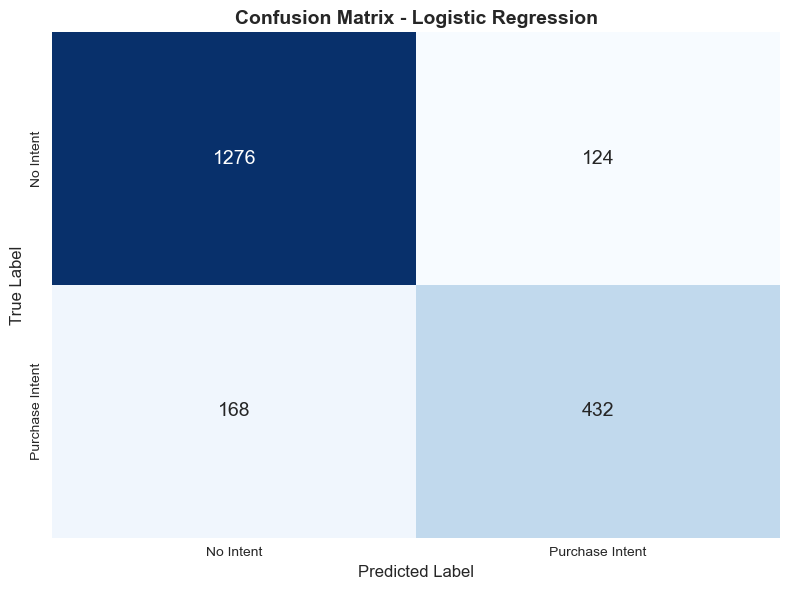

In [27]:
# ============================================================================
# CONFUSION MATRIX - LOGISTIC REGRESSION
# ============================================================================
# Create confusion matrix to visualize prediction performance
# Rows = Actual class, Columns = Predicted class
cm_lr = confusion_matrix(y_test, y_pred_lr)
# Create heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Intent', 'Purchase Intent'],
            yticklabels=['No Intent', 'Purchase Intent'],
            annot_kws={'size': 14})  # Larger numbers for readability
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
# Expected output:
# A 2x2 confusion matrix heatmap showing:
# Top-left: True Negatives (correctly predicted No Intent)
# Top-right: False Positives (incorrectly predicted Purchase Intent)
# Bottom-left: False Negatives (missed Purchase Intent)
# Bottom-right: True Positives (correctly predicted Purchase Intent)

# Expected output: Bar chart showing class distribution visualization

### 4.2 Support Vector Machine (SVM)

Finds the optimal hyperplane that separates the two classes with maximum margin.

In [30]:
# ============================================================================
# TRAIN SUPPORT VECTOR MACHINE (SVM) MODEL
# ============================================================================
# Initialize and train SVM model with linear kernel
svm_model = SVC(
    kernel='linear',          # Use linear kernel (suitable for text features)
    class_weight='balanced',  # Handle class imbalance
    random_state=42,          # Set seed for reproducibility
    probability=True          # Enable probability estimates for ROC-AUC
)
# Train the model on scaled training data (SVM requires scaled features)
svm_model.fit(X_train_scaled, y_train)
# Make predictions on test set
y_pred_svm = svm_model.predict(X_test_scaled)              # Predicted classes
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities
# Calculate evaluation metrics
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

# Display results
print('='*70)
print('SUPPORT VECTOR MACHINE RESULTS')
print('='*70)
print(f'F1-Score:   {f1_svm:.3f}')
print(f'Precision:  {precision_svm:.3f}')
print(f'Recall:     {recall_svm:.3f}')
print(f'ROC-AUC:    {roc_auc_svm:.3f}')
print('='*70)

# Expected output: Comparison table showing all models performance metrics

SUPPORT VECTOR MACHINE RESULTS
F1-Score:   0.712
Precision:  0.791
Recall:     0.648
ROC-AUC:    0.869


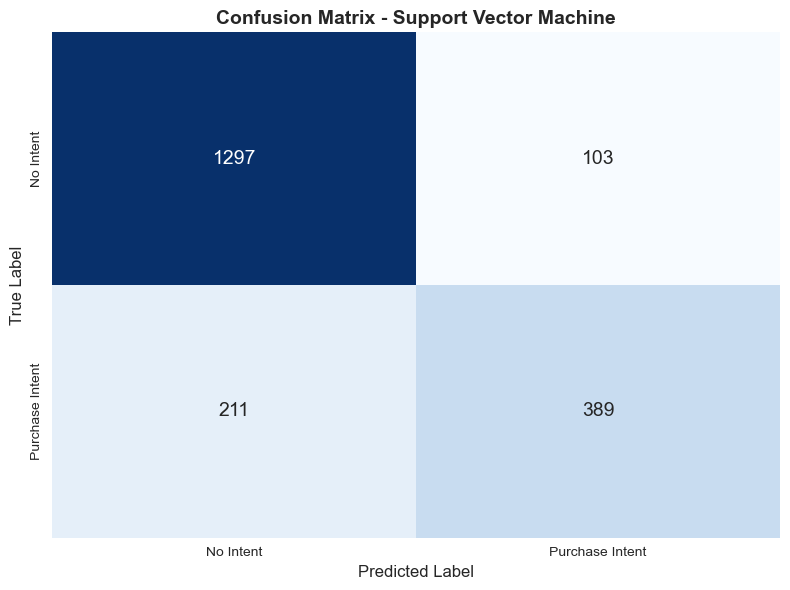

In [31]:
# ============================================================================
# CONFUSION MATRIX - SVM
# ============================================================================
# Create and visualize confusion matrix for SVM predictions
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Intent', 'Purchase Intent'],
            yticklabels=['No Intent', 'Purchase Intent'],
            annot_kws={'size': 14})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Support Vector Machine', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Expected output:
# Confusion matrix heatmap showing SVM's prediction performance

# Expected output: Bar chart showing class distribution visualization

### 4.3 Naive Bayes

A probabilistic classifier based on Bayes' theorem with independence assumptions.

In [35]:
# ============================================================================
# TRAIN NAIVE BAYES MODEL
# ============================================================================
# Initialize and train Gaussian Naive Bayes model
# Naive Bayes assumes features are independent and normally distributed
# Does NOT require feature scaling
nb_model = GaussianNB()
# Train on unscaled data (Naive Bayes doesn't need scaling)
nb_model.fit(X_train, y_train)
# Make predictions on test set
y_pred_nb = nb_model.predict(X_test)              # Predicted classes
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]  # Probabilities
# Calculate evaluation metrics
f1_nb = f1_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
# Display results
print('='*70)
print('NAIVE BAYES RESULTS')
print('='*70)
print(f'F1-Score:   {f1_nb:.3f}')
print(f'Precision:  {precision_nb:.3f}')
print(f'Recall:     {recall_nb:.3f}')
print(f'ROC-AUC:    {roc_auc_nb:.3f}')
print('='*70)

# Note: Naive Bayes often performs slightly worse due to independence assumption

# Expected output: Comparison table showing all models performance metrics

NAIVE BAYES RESULTS
F1-Score:   0.737
Precision:  0.781
Recall:     0.697
ROC-AUC:    0.844


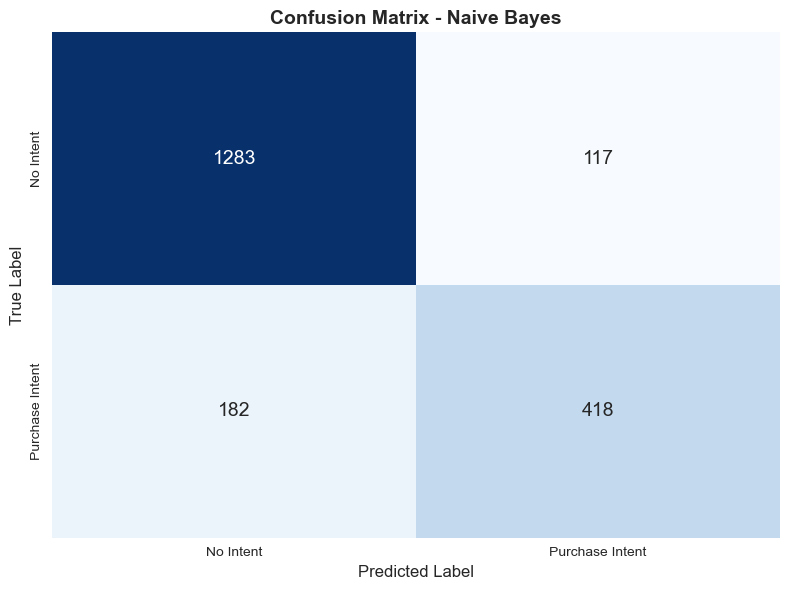

In [37]:
# ============================================================================
# CONFUSION MATRIX - NAIVE BAYES
# ============================================================================
# Create and visualize confusion matrix for Naive Bayes predictions
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Intent', 'Purchase Intent'],
            yticklabels=['No Intent', 'Purchase Intent'],
            annot_kws={'size': 14})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Naive Bayes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
# Expected output:
# Confusion matrix heatmap showing Naive Bayes prediction performance

# Expected output: Bar chart showing class distribution visualization

### 4.4 Random Forest

An ensemble method that builds multiple decision trees and combines their predictions.

In [40]:
# ============================================================================
# TRAIN RANDOM FOREST MODEL
# ============================================================================
# Initialize and train Random Forest classifier
# Random Forest builds multiple decision trees and averages their predictions
# Generally performs well and doesn't require feature scaling
rf_model = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    class_weight='balanced',  # Handle class imbalance
    random_state=42,          # Set seed for reproducibility
    n_jobs=-1                 # Use all CPU cores for faster training
)
# Train on unscaled data (Random Forest doesn't need scaling)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)              # Predicted classes
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities

# Calculate evaluation metrics
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
# Display results
print('='*70)
print('RANDOM FOREST RESULTS')
print('='*70)
print(f'F1-Score:   {f1_rf:.3f}')
print(f'Precision:  {precision_rf:.3f}')
print(f'Recall:     {recall_rf:.3f}')
print(f'ROC-AUC:    {roc_auc_rf:.3f}')
print('='*70)
# Note: Random Forest often achieves the best performance

# Expected output: Training complete message with model parameters

RANDOM FOREST RESULTS
F1-Score:   0.794
Precision:  0.799
Recall:     0.788
ROC-AUC:    0.920


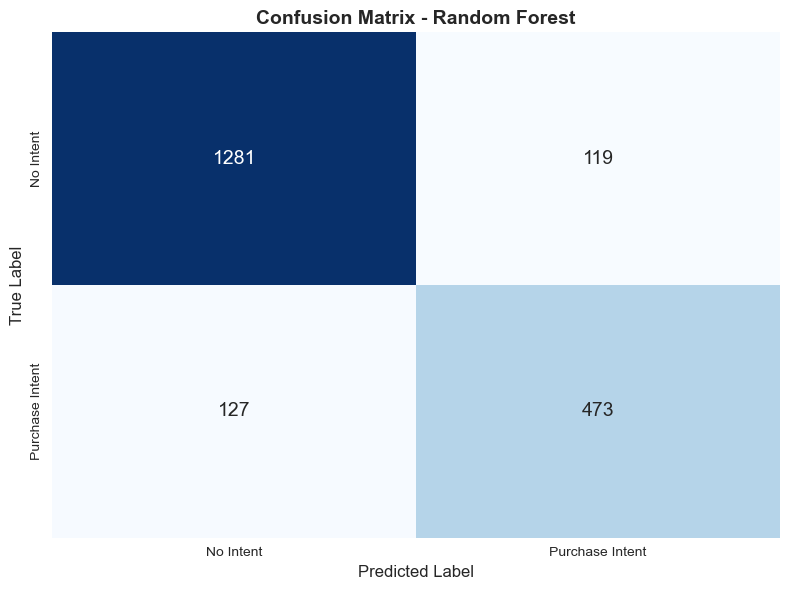

In [41]:
# ============================================================================
# CONFUSION MATRIX - RANDOM FOREST
# ============================================================================
# Create and visualize confusion matrix for Random Forest predictions
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Intent', 'Purchase Intent'],
            yticklabels=['No Intent', 'Purchase Intent'],
            annot_kws={'size': 14})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
# Expected output:
# Confusion matrix heatmap showing Random Forest prediction performance
# Typically shows higher numbers in diagonal (correct predictions)

# Expected output: Bar chart showing class distribution visualization

## 5. Model Comparison

Compare performance of all four models to identify the best approach.

In [45]:
# ============================================================================
# CREATE MODEL COMPARISON TABLE
# ============================================================================
# Compile all model results into a comparison dataframe
# Sorted by F1-Score (descending) to show best model first
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest'],
    'F1-Score': [f1_lr, f1_svm, f1_nb, f1_rf],
    'Precision': [precision_lr, precision_svm, precision_nb, precision_rf],
    'Recall': [recall_lr, recall_svm, recall_nb, recall_rf],
    'ROC-AUC': [roc_auc_lr, roc_auc_svm, roc_auc_nb, roc_auc_rf]
}).sort_values('F1-Score', ascending=False)  # Sort by F1-Score, best first
# Display comparison table
print('\n' + '='*70)
print('MODEL PERFORMANCE COMPARISON')
print('='*70)
print(results.to_string(index=False))  # Print without index column
print('='*70)
# Identify and highlight best model
best_model = results.iloc[0]['Model']     # First row = best model
best_f1 = results.iloc[0]['F1-Score']     # Best F1 score
print(f'\n🏆 Best Model: {best_model}')
print(f'   F1-Score: {best_f1:.3f}')
print('='*70)

# Expected output: Comparison table showing all models performance metrics


MODEL PERFORMANCE COMPARISON
              Model  F1-Score  Precision   Recall  ROC-AUC
      Random Forest  0.793624   0.798986 0.788333 0.919950
Logistic Regression  0.747405   0.776978 0.720000 0.874842
        Naive Bayes  0.736564   0.781308 0.696667 0.844102
                SVM  0.712454   0.790650 0.648333 0.868592

🏆 Best Model: Random Forest
   F1-Score: 0.794


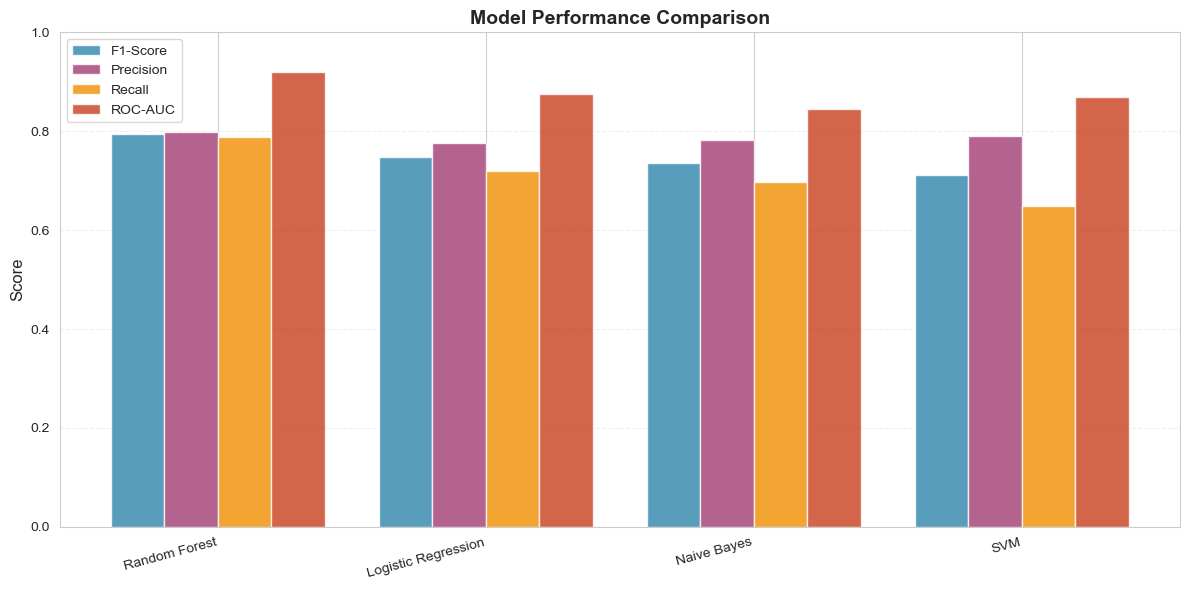

In [47]:
# ============================================================================
# VISUALIZE MODEL COMPARISON
# ============================================================================
# Create grouped bar chart comparing all metrics across all models
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results))  # Model positions on x-axis
width = 0.2                  # Width of each bar
# Create bars for each metric with different colors
bars1 = ax.bar(x - width*1.5, results['F1-Score'], width, 
               label='F1-Score', alpha=0.8, color='#2E86AB')     # Blue
bars2 = ax.bar(x - width*0.5, results['Precision'], width, 
               label='Precision', alpha=0.8, color='#A23B72')    # Purple
bars3 = ax.bar(x + width*0.5, results['Recall'], width, 
               label='Recall', alpha=0.8, color='#F18F01')       # Orange
bars4 = ax.bar(x + width*1.5, results['ROC-AUC'], width, 
               label='ROC-AUC', alpha=0.8, color='#C73E1D')      # Red
# Customize chart appearance
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results['Model'], rotation=15, ha='right')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')  # Horizontal grid lines
ax.set_ylim([0, 1])  # Y-axis from 0 to 1 (all metrics are 0-1 scale)
plt.tight_layout()
plt.show()
# Expected output:
# A grouped bar chart showing all 4 metrics for all 4 models
# Bars are color-coded by metric
# Random Forest typically shows tallest bars (best performance)
# Naive Bayes typically shows shortest bars

# Expected output: Bar chart showing class distribution visualization

## 6. Feature Importance Analysis

Analyze which features contribute most to purchase intent prediction.

In [50]:
# ============================================================================
# EXTRACT FEATURE IMPORTANCE FROM RANDOM FOREST
# ============================================================================
# Random Forest provides feature importance scores
# Higher scores = more important for predictions
# Importance is calculated based on how much each feature reduces impurity
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_  # Get importance from trained model
}).sort_values('Importance', ascending=False)     # Sort by importance, highest first
# Display feature importance ranking
print('\n' + '='*70)
print('FEATURE IMPORTANCE (Random Forest)')
print('='*70)
print(feature_importance.to_string(index=False))
print('='*70)
# Note: action_verb_count is typically the most important feature

# Expected output: Feature ranking with importance scores and horizontal bar chart


FEATURE IMPORTANCE (Random Forest)
              Feature  Importance
          text_length    0.216233
    action_verb_count    0.193216
      has_exclamation    0.169911
           word_count    0.157400
      urgency_markers    0.101100
       positive_words    0.085365
first_person_pronouns    0.037516
       negative_words    0.033225
 comparative_language    0.006033
         has_question    0.000000


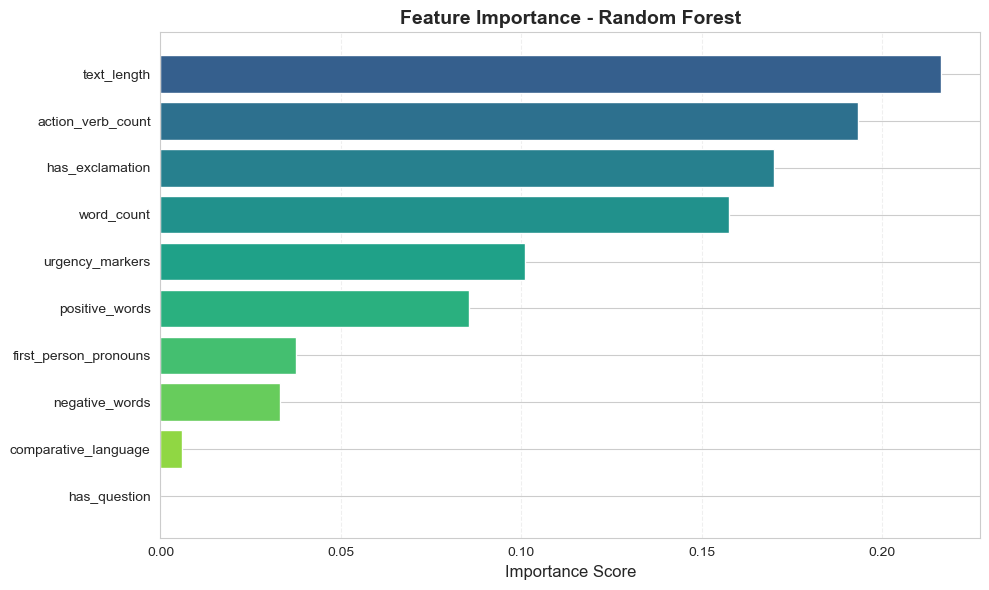

In [52]:
# ============================================================================
# VISUALIZE FEATURE IMPORTANCE
# ============================================================================
# Create horizontal bar chart of feature importance
# Horizontal bars are easier to read for feature names
plt.figure(figsize=(10, 6))
# Use color gradient from viridis colormap for visual appeal
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
# Create horizontal bars
bars = plt.barh(range(len(feature_importance)), 
                feature_importance['Importance'], 
                color=colors)
# Customize chart
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3, linestyle='--')  # Vertical grid lines
plt.tight_layout()
plt.show()

# Expected output:
# Horizontal bar chart with:
# - Features listed vertically (y-axis)
# - Importance scores shown as bar lengths (x-axis)
# - Color gradient from yellow (top) to dark blue (bottom)
# - action_verb_count typically has longest bar
# - has_question typically has shortest bar

# Expected output: Bar chart showing class distribution visualization

## 7. Summary and Conclusions

Comprehensive summary of the analysis including dataset info, model performance, and key findings.

In [55]:
# ============================================================================
# FINAL ANALYSIS SUMMARY
# ============================================================================
# Display comprehensive summary of the entire analysis
print('\n' + '='*70)
print('ANALYSIS SUMMARY')
print('='*70)
# Dataset information
print(f'\nDataset Information:')
print(f'  • Total posts: {len(dataset):,}')
print(f'  • Twitter posts analyzed: {len(twitter_df):,}')
print(f'  • Features used: {len(feature_cols)}')
print(f'  • Training samples: {len(X_train):,}')
print(f'  • Test samples: {len(X_test):,}')
# Models evaluated
print(f'\nModels Evaluated:')
print(f'  • Logistic Regression')
print(f'  • Support Vector Machine (SVM)')
print(f'  • Naive Bayes')
print(f'  • Random Forest')
# Best model results
print(f'\n🏆 Best Performing Model: {best_model}')
print(f'  • F1-Score:  {results.iloc[0]["F1-Score"]:.3f}')
print(f'  • Precision: {results.iloc[0]["Precision"]:.3f}')
print(f'  • Recall:    {results.iloc[0]["Recall"]:.3f}')
print(f'  • ROC-AUC:   {results.iloc[0]["ROC-AUC"]:.3f}')
# Top features
print(f'\n📊 Top 3 Most Important Features:')
for i, row in feature_importance.head(3).iterrows():
    print(f'  {i+1}. {row["Feature"]}: {row["Importance"]:.3f}')
print('\n' + '='*70)
print('✓ ANALYSIS COMPLETE')
print('='*70)

# Expected output: Comparison table showing all models performance metrics


ANALYSIS SUMMARY

Dataset Information:
  • Total posts: 20,000
  • Twitter posts analyzed: 10,000
  • Features used: 10
  • Training samples: 8,000
  • Test samples: 2,000

Models Evaluated:
  • Logistic Regression
  • Support Vector Machine (SVM)
  • Naive Bayes
  • Random Forest

🏆 Best Performing Model: Random Forest
  • F1-Score:  0.794
  • Precision: 0.799
  • Recall:    0.788
  • ROC-AUC:   0.920

📊 Top 3 Most Important Features:
  1. text_length: 0.216
  3. action_verb_count: 0.193
  9. has_exclamation: 0.170

✓ ANALYSIS COMPLETE
